<a href="https://colab.research.google.com/github/Gimmi-07/FFML_Projects_and_Labs/blob/main/FFML%20Module%2002%2CLAB%2004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT

FMML Module 02, Lab 04<br>
 NAME: Grishma Yenchilwar ( grishma.yenchilwar.cse@ghrce.raisoni.net ) <br>
 Date: 23 Oct 2023 <br>


This lab will be based upon t-SNE which is a dimensionality reduction algorithm used to visualize high dimensional datasets.

t-SNE stands for t-Distributed Stochastic Neighbor Embedding. It is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008 (Link to the paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

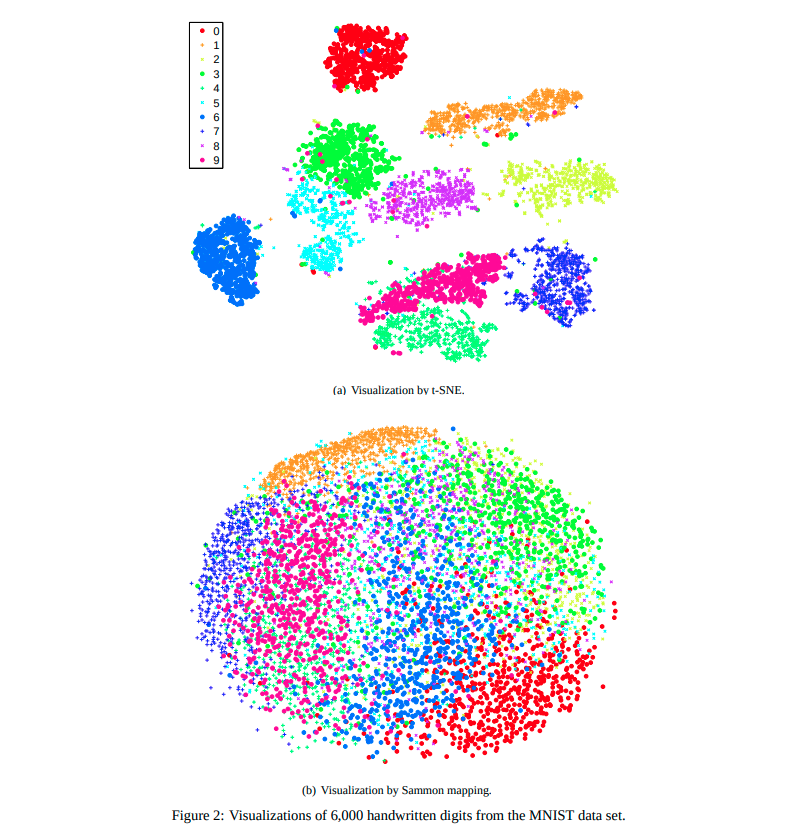

t-SNE has a tuneable parameter, **perplexity** which balances attention between the local and global aspects of your data. It is a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of t-SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

Also the t-SNE algorithm doesn’t always produce similar output on successive runs as there are additional hyperparameters related to the optimization process.

### HOW DOES T-SNE WORK??

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

1. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

2. This step is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (See fig below). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

3. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

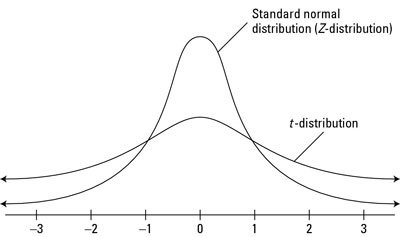

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

In [ ]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [ ]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 23456781

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

1797 images each of size 8 x 8 loaded using load_digits()

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

---



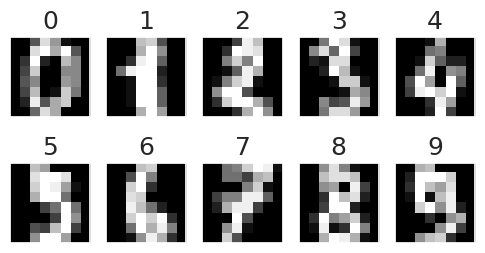

In [ ]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [ ]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

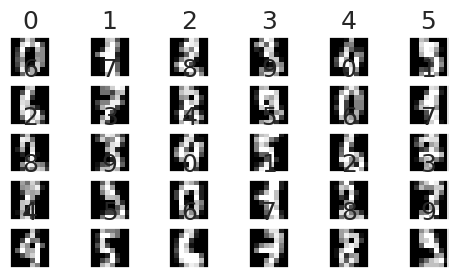

In [ ]:
nrows, ncols = 5, 6
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [ ]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

#### Visualizing the data in the projected space

---



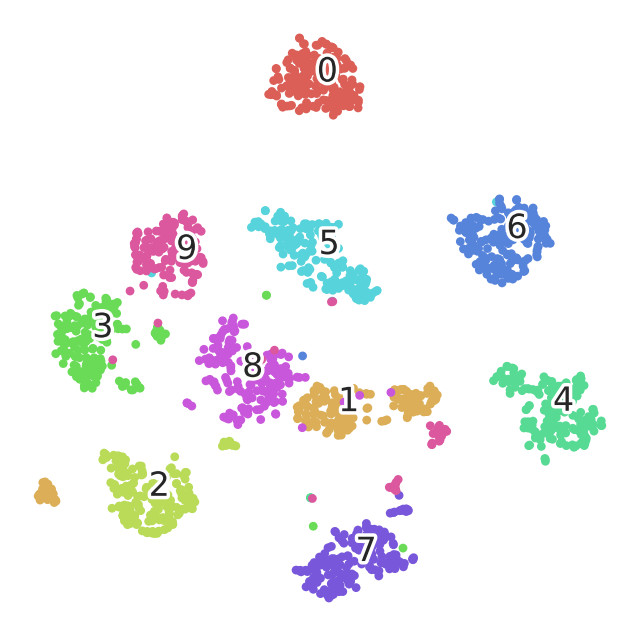

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x77ff90636650>)

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 14))

    # We create a scatter plot.
    f = plt.figure(figsize=(9, 9))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=50,
                    c=palette[colors.astype(int)])
    plt.xlim(-35, 35)
    plt.ylim(-35, 35)
    ax.axis('off')
    ax.axis('tight')
      # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=26)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()




# Tweaking some of the hyperparameters to better understand their role

---

### Changing the PERPLEXITY values


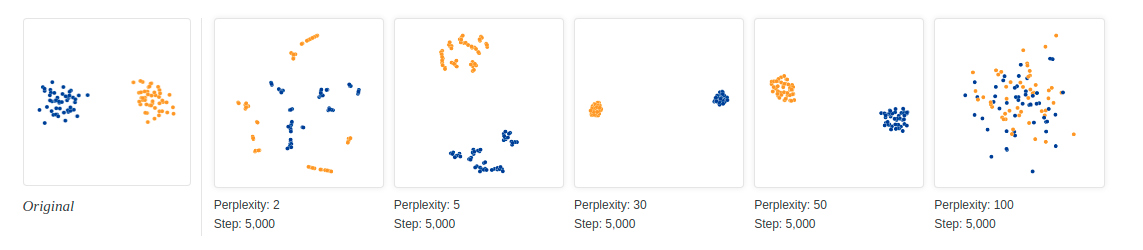

With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters, although with very different shapes. Outside that range, things get a little weird. With perplexity 2, local variations dominate. The image for perplexity 100, with merged clusters, illustrates a pitfall: for the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.



---


1. n_components : 2
2. perplexity : **5**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

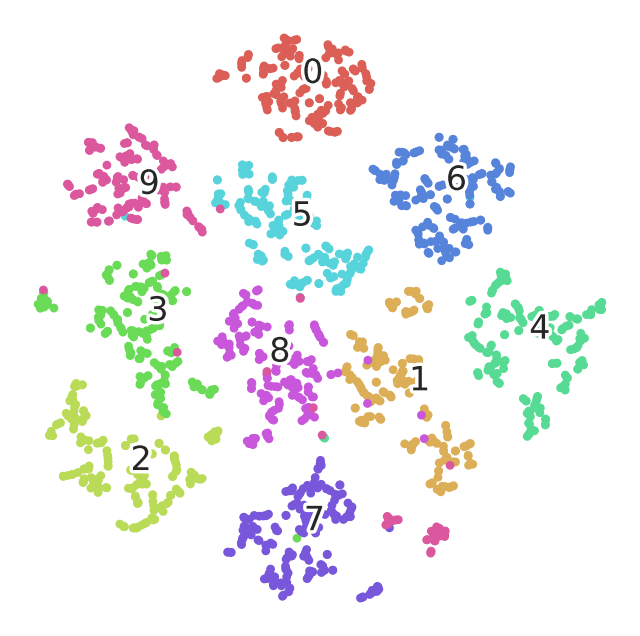

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x77ff905cfe50>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.





---


1. n_components : 2
2. perplexity : **100**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

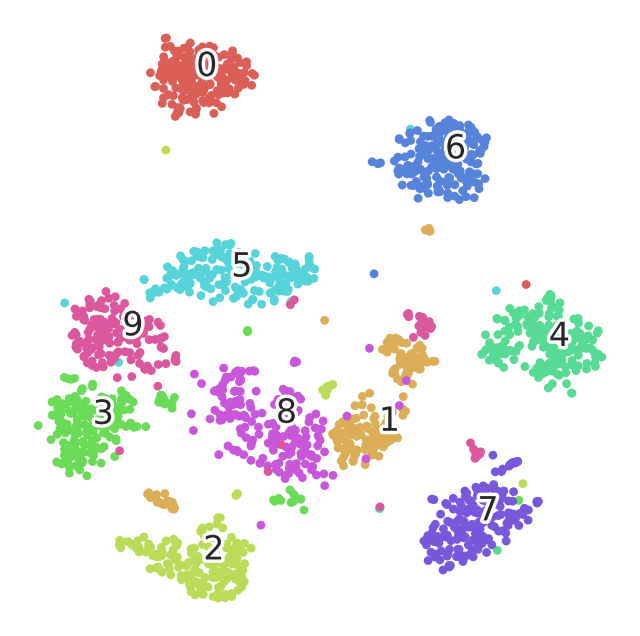

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7943eac8b2e0>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

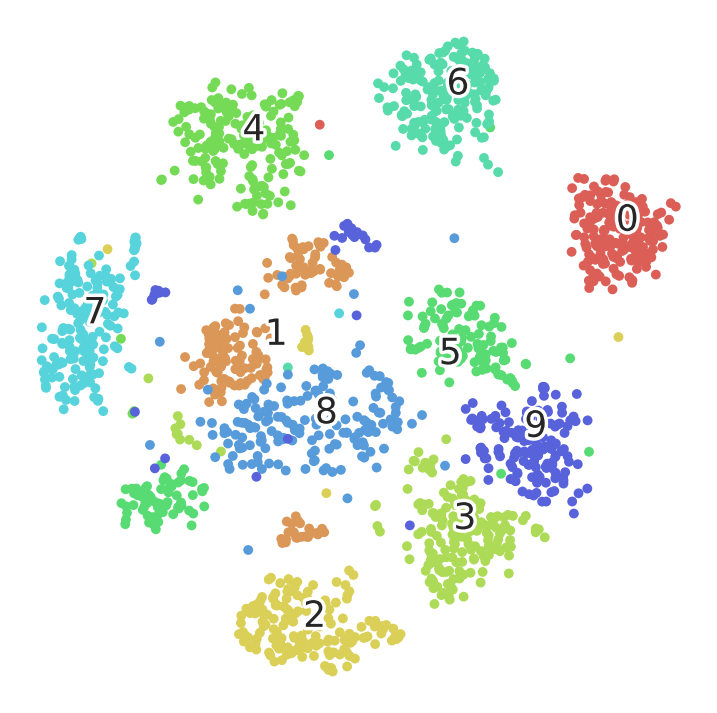

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=200).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---

### Changing the NUMBER OF ITERATIONS

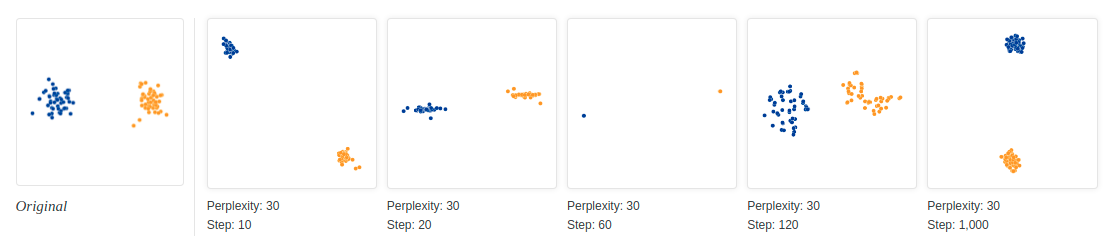

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30
3. n_iter : **250**
4. method : ‘barnes_hut’


---

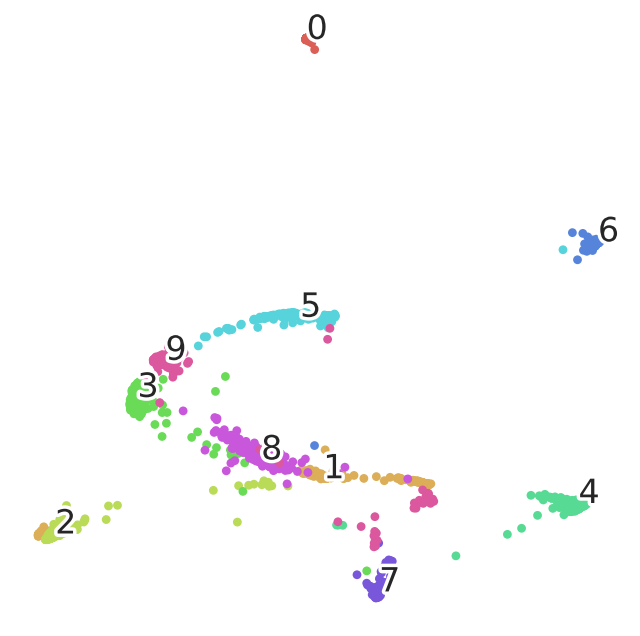

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7943eac3be20>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

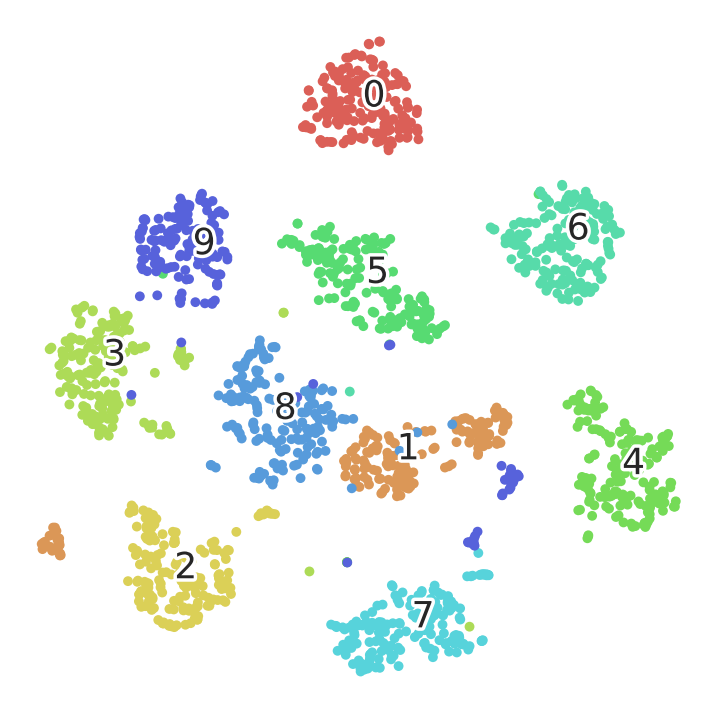

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=500).fit_transform(X)

scatter(digits_proj, y)

As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups.

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

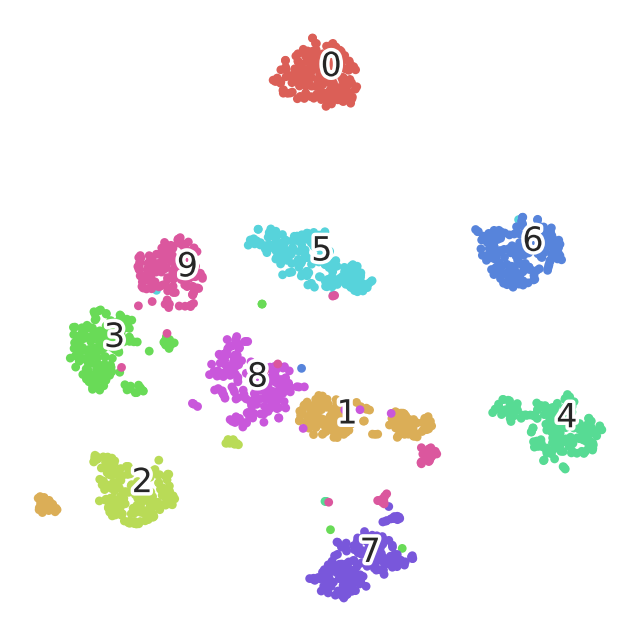

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7943ea9c2da0>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

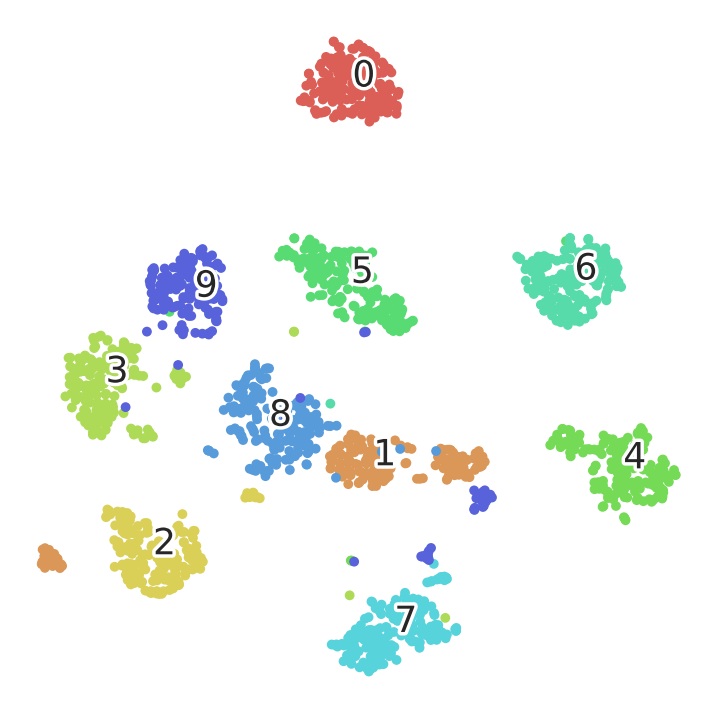

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=2000).fit_transform(X)

scatter(digits_proj, y)

Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---

### Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.


---

1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : **‘exact’**


---

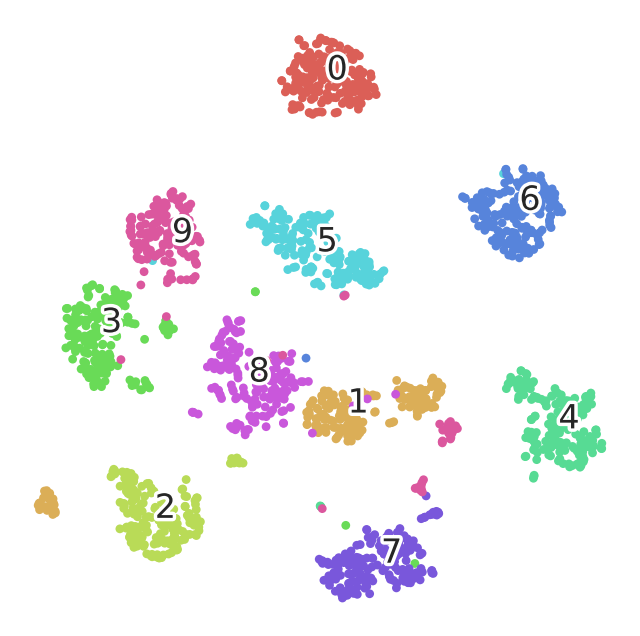

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7943ea7e26b0>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

## EXERCISE

---



Try out different perplexity and iteration values to better appreciate the concepts taught.

You can modify the code in the cell below to check the resultant plots.

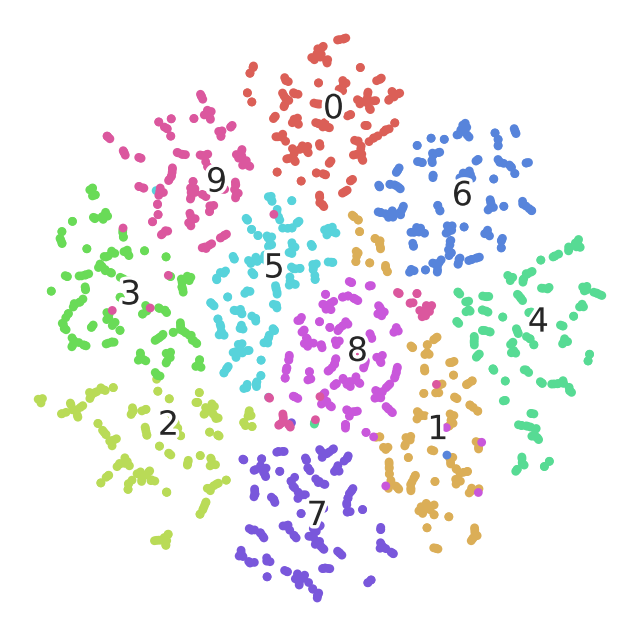

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7943ea7afaf0>)

In [ ]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 2
number_iterations = 1000
method = "barnes_hut"

###############################################################

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

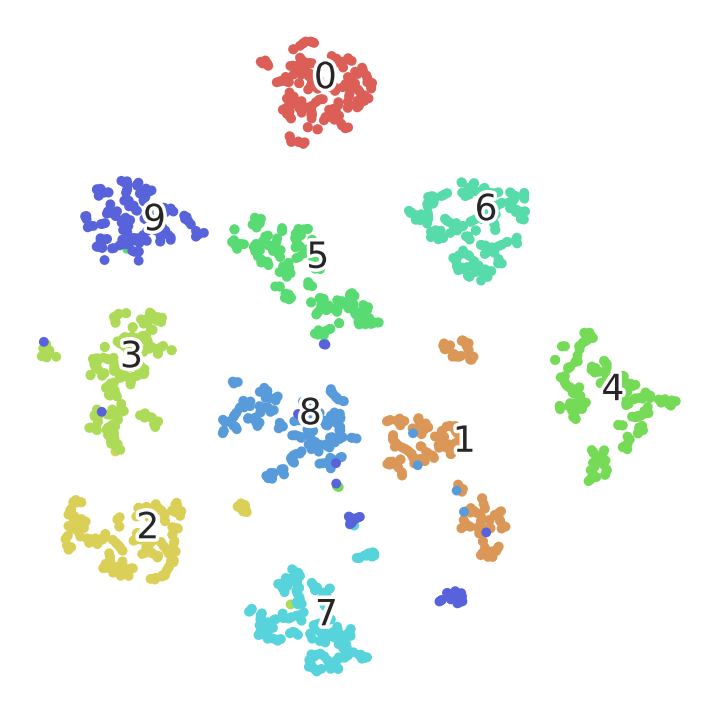

In [ ]:
perplexity_value = 6
number_iterations = 9000
method = "barnes_hut"

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)



---

## QUESTION:

Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?


##### Pointers:

1. Which of the two algorithms is linear and which one is non-linear?
2. How does the non-linearity in one of these two algorithms help in capturing certain data sets?
3. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?
4. Can you comment on which one of the two is computationally more expensive?


Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) are both dimensionality reduction techniques used in machine learning and data analysis, but they have distinct differences in their approaches and use cases.
1. **Linearity vs. Non-Linearity**:
   - **PCA**: PCA is a linear dimensionality reduction technique. It works by finding linear combinations of the original features that capture the most variance in the data. This means that PCA is effective when the underlying data relationships are linear.
   - **t-SNE**: t-SNE is a non-linear dimensionality reduction technique. It focuses on preserving pairwise similarities or distances between data points, making it better suited for capturing complex non-linear patterns in the data.
2. **Preservation of Global vs. Local Structure**:
   - **PCA**: PCA primarily focuses on preserving the global structure of the data. It aims to capture the directions of maximum variance, which may result in the loss of local structure.
   - **t-SNE**: t-SNE is designed to preserve the local structure of data. It minimizes the divergence between probability distributions over pairs of data points in the high-dimensional space and the low-dimensional space, emphasizing the relationships between nearby data points.
3. **Sensitivity to Outliers**:
   - **PCA**: PCA is sensitive to outliers in the data because it seeks to maximize variance, and outliers can have a significant impact on the covariance matrix.
   - **t-SNE**: t-SNE is less sensitive to outliers since it primarily focuses on preserving pairwise similarities, and outliers have less influence on these local relationships.
4. **Interpretability**:
   - **PCA**: PCA provides interpretable results in terms of principal components, which are linear combinations of the original features. These components have clear meaning, often related to the most significant sources of variance in the data.
   - **t-SNE**: t-SNE does not produce easily interpretable components. Its primary purpose is visualization and capturing local patterns, making it less suited for extracting meaningful features.
5. **Computational Complexity**:
   - **PCA**: PCA is computationally efficient and can be applied to high-dimensional datasets because it involves solving the eigenvalue problem, which can be done relatively quickly.
   - **t-SNE**: t-SNE can be computationally expensive, especially for large datasets, as it involves pairwise computations and optimization over the high-dimensional space.
6. **Use Cases**:
   - **PCA**: PCA is often used for data preprocessing, noise reduction, and feature extraction. It is also employed in some cases for visualization, although it emphasizes global patterns.
   - **t-SNE**: t-SNE is commonly used for data visualization, particularly when exploring and visualizing high-dimensional data with complex local relationships, such as in natural language processing and image analysis.

The non-linearity in algorithms like t-Distributed Stochastic Neighbor Embedding (t-SNE) helps in capturing certain datasets by allowing them to effectively model and represent complex, non-linear relationships among data points. Here's how non-linearity in t-SNE benefits the capture of specific data sets:

1. **Complex Data Structures**:
   - Many real-world datasets exhibit intricate, non-linear relationships between data points. Linear methods like Principal Component Analysis (PCA) may struggle to capture these intricate patterns. For example, in natural language processing, data points representing words or documents can have complex, non-linear relationships based on their semantics, which t-SNE can capture effectively.

2. **Preservation of Local Structure**:
   - t-SNE is specifically designed to preserve the local structure of data. It focuses on maintaining pairwise similarities between data points. This means that data points that are close to each other in the high-dimensional space will remain close in the low-dimensional space. This is crucial for datasets where the local relationships are more important than the global structure. For instance, in image data, objects or patterns within an image may have complex local interactions, and t-SNE can help preserve these relationships.

3. **Cluster Separation**:
   - t-SNE is effective at separating clusters of data points in a non-linear fashion. In datasets where distinct groups or clusters of data points are not easily separable by linear methods, t-SNE can create a visualization or lower-dimensional representation where these clusters are well-separated. This is useful in various applications, such as clustering and classification tasks.

4. **Visualization**:
   - t-SNE is often used for data visualization, allowing analysts and researchers to explore high-dimensional data in a way that reveals underlying structures and relationships. Its non-linearity helps in creating visualizations that highlight local patterns and groupings, making it easier to interpret complex datasets.

5. **Noise Tolerance**:
   - t-SNE is less sensitive to outliers and noise in the data compared to linear methods like PCA. Outliers and noisy data points have less influence on the preservation of pairwise similarities, making t-SNE more robust in situations where the data contains irregularities.

It-Distributed Stochastic Neighbor Embedding (t-SNE) is generally computationally more expensive than Principal Component Analysis (PCA).



---
 ## Some interesting references:

 1. https://blog.paperspace.com/dimension-reduction-with-t-sne/
 2. https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
 3. https://distill.pub/2016/misread-tsne/



---


